### In this notebook, I made a tanglegram as a visual aid for comparing the true tree witht the MCC tree

In [1]:
import pandas as pd
import numpy as np
import dendropy
import tanglegram as tg
import matplotlib.pyplot as plt

In [2]:
### Let's define at the ground true tree and states

with open('gt_unscaled.nw') as f:
    lines = f.read()
true_tree = lines[:-2]
true_tree += ";"
true_tree = dendropy.Tree.get_from_string(true_tree, "newick")
f.close()

In [3]:
true_tree.print_plot()

                                                                                                      /------- leaf36 
                                               /------------------------------------------------------+               
                                               |                                                      \------- leaf37 
                                               |                                                                      
                                               |                                              /--------------- leaf90 
                                               |                                      /-------+                       
                                               |                                      |       |       /------- leaf96 
                                               |                                      |       \-------+               
                                               |

In [4]:
### Let's define the summary tree and states

with open('summary_tree_newick') as f:
    lines = f.read()
summary_tree = lines[:-2]
summary_tree += ";"
summary_tree = dendropy.Tree.get_from_string(summary_tree, "newick")

In [5]:
summary_tree.print_plot()

                                                                                                       /------ leaf100
                                                                                                /------+              
                                                                                         /------+      \------ leaf98 
                                                                                         |      |                     
                                                                                  /------+      \------------- leaf99 
                                                                                  |      |                            
                                                                           /------+      \-------------------- leaf86 
                                                                           |      |                                   
                                                

In [6]:
### Let's draw the tanglegram now

true_leaves = true_tree.leaf_nodes() # Defining a list of leaf nodes of the true_tree
true_labels = [i.taxon.label for i in true_leaves] # Defining a list of labels of the leaf nodes of the true_tree
true_labels.sort()
data = np.zeros(shape = (len(true_labels), len(true_labels))) # Defining a 51*51 matrix of zeros
true_matrix = pd.DataFrame(data, columns=true_labels, index=true_labels) # Defining a 51*51 matrix for leaves and their MRCA distances
# Iterating over every pair of leaves
for i in range(0, len(true_leaves)-1):
    for j in range(i+1, len(true_leaves)):
        i_label = true_leaves[i].taxon.label # Getting the label for leaf 1
        j_label = true_leaves[j].taxon.label # Getting the label for leaf 2
        mrca = true_tree.mrca(taxon_labels=[i_label, j_label]) # Getting the MRCA of leaf1 and leaf 2
        distance = mrca.distance_from_tip() # Getting the distance from the MRCA node to the leaves
        true_matrix[i_label][j_label] = distance # Insering that distance to the matrix
        true_matrix[j_label][i_label] = distance # Insering that distance to the matrix (symmetric)

In [7]:
true_matrix.head()

,leaf100,leaf101,leaf11,leaf13,leaf14,leaf15,leaf17,leaf18,leaf19,leaf23,...,leaf88,leaf89,leaf9,leaf90,leaf92,leaf93,leaf96,leaf97,leaf98,leaf99
leaf100,0.000000,0.007928,0.095142,0.103070,0.103070,0.103070,0.079285,0.095142,0.095142,0.071356,...,0.047571,0.047571,0.087213,0.031714,0.031714,0.031714,0.031714,0.031714,0.015857,0.015857
leaf101,0.007928,0.000000,0.095142,0.103070,0.103070,0.103070,0.079285,0.095142,0.095142,0.071356,...,0.047571,0.047571,0.087213,0.031714,0.031714,0.031714,0.031714,0.031714,0.015857,0.015857
leaf11,0.095142,0.095142,0.000000,0.103070,0.103070,0.103070,0.095142,0.063428,0.063428,0.095142,...,0.095142,0.095142,0.095142,0.095142,0.095142,0.095142,0.095142,0.095142,0.095142,0.095142
leaf13,0.103070,0.103070,0.103070,0.000000,0.092763,0.092763,0.103070,0.103070,0.103070,0.103070,...,0.103070,0.103070,0.103070,0.103070,0.103070,0.103070,0.103070,0.103070,0.103070,0.103070
leaf14,0.103070,0.103070,0.103070,0.092763,0.000000,0.046382,0.103070,0.103070,0.103070,0.103070,...,0.103070,0.103070,0.103070,0.103070,0.103070,0.103070,0.103070,0.103070,0.103070,0.103070


In [8]:
summary_leaves = summary_tree.leaf_nodes() # Defining a list of leaf nodes of the summary_tree
summary_labels = [i.taxon.label for i in summary_leaves] # Defining a list of labels of the leaf nodes of the summary_tree
summary_labels.sort()
data = np.zeros(shape = (len(summary_labels), len(summary_labels))) # Defining a 52*52 matrix of zeros
summary_matrix = pd.DataFrame(data, columns=summary_labels, index=summary_labels) # Defining a 52*52 matrix for leaves and their MRCA distances
# Iterating over every pair of leaves
for i in range(0, len(summary_leaves)-1):
    for j in range(i+1, len(summary_leaves)):
        i_label = summary_leaves[i].taxon.label # Getting the label for leaf 1
        j_label = summary_leaves[j].taxon.label # Getting the label for leaf 2
        mrca = summary_tree.mrca(taxon_labels=[i_label, j_label]) # Getting the MRCA of leaf1 and leaf 2
        distance = mrca.distance_from_tip() # Getting the distance from the MRCA node to the leaves
        summary_matrix[i_label][j_label] = distance # Insering that distance to the matrix (symmetric)
        summary_matrix[j_label][i_label] = distance # Insering that distance to the matrix (symmetric)

In [9]:
summary_matrix.head()

,leaf1,leaf100,leaf101,leaf11,leaf13,leaf14,leaf15,leaf17,leaf18,leaf19,...,leaf88,leaf89,leaf9,leaf90,leaf92,leaf93,leaf96,leaf97,leaf98,leaf99
leaf1,0.000000,0.043437,0.043437,0.043437,0.043437,0.043437,0.043437,0.043437,0.043437,0.043437,...,0.043437,0.043437,0.043437,0.043437,0.043437,0.043437,0.043437,0.043437,0.043437,0.043437
leaf100,0.043437,0.000000,0.003639,0.026333,0.035403,0.035403,0.035403,0.020616,0.026333,0.026333,...,0.014709,0.014709,0.023133,0.008423,0.008423,0.008423,0.008423,0.008423,0.001570,0.001835
leaf101,0.043437,0.003639,0.000000,0.026333,0.035403,0.035403,0.035403,0.020616,0.026333,0.026333,...,0.014709,0.014709,0.023133,0.008423,0.008423,0.008423,0.008423,0.008423,0.003639,0.003639
leaf11,0.043437,0.026333,0.026333,0.000000,0.035403,0.035403,0.035403,0.026333,0.009394,0.023762,...,0.026333,0.026333,0.026333,0.026333,0.026333,0.026333,0.026333,0.026333,0.026333,0.026333
leaf13,0.043437,0.035403,0.035403,0.035403,0.000000,0.024965,0.024965,0.035403,0.035403,0.035403,...,0.035403,0.035403,0.035403,0.035403,0.035403,0.035403,0.035403,0.035403,0.035403,0.035403


INFO  : Generating linkage from distances (tanglegram.tangle)
INFO  : Generating linkage from distances (tanglegram.tangle)
INFO  : Finished optimising at entanglement 0.11 (tanglegram.tangle)
INFO  : Done. Use matplotlib.pyplot.show() to show plot. (tanglegram.tangle)


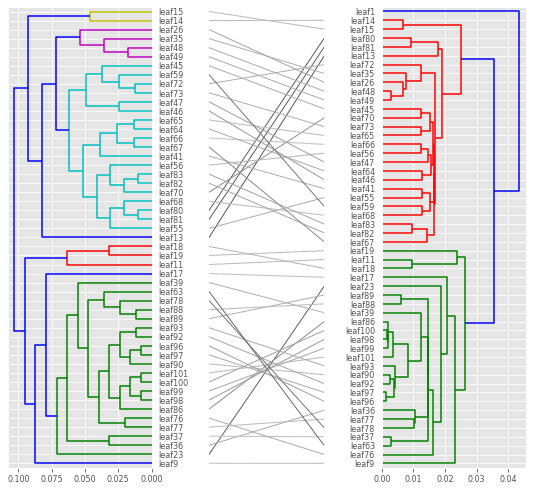

In [10]:
tg.untangle
fig = tg.plot(true_matrix, summary_matrix, sort=True)
plt.show()